In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
#IMPORT FULL MUSIC DF
df = pd.read_csv("C:\\Users\\Juliane\\Documents\\GitHub\\labs_repo\\Spotipy\\music_df.csv", on_bad_lines='skip')

In [3]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [4]:
#DROP UNNECESSARY COLUMNS
# df_new = df.drop(('key', 'mode', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'), axis=1)
columns_to_drop = ['key', 'mode', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'id']
df_new = df.drop(columns=columns_to_drop, axis=1)


In [5]:
#CREATING THE DATAFRAME FOR TRAINING THE MODEL
df_new


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.765,0.52900,-8.243,0.2340,0.408,0.004310,0.0862,0.5290,123.946
1,0.605,0.46000,-7.360,0.0476,0.467,0.000463,0.1120,0.2160,77.947
2,0.679,0.48400,-10.156,0.0279,0.683,0.001230,0.0833,0.4540,139.951
3,0.717,0.68000,-6.263,0.0371,0.466,0.000083,0.2400,0.8080,107.962
4,0.496,0.80200,-3.684,0.0396,0.107,0.000000,0.3070,0.3710,101.024
...,...,...,...,...,...,...,...,...,...
858,0.108,0.01360,-27.620,0.0426,0.895,0.867000,0.2040,0.0753,77.981
859,0.174,0.00950,-36.054,0.0440,0.843,0.064300,0.0739,0.1020,103.265
860,0.131,0.01450,-30.363,0.0366,0.826,0.332000,0.1100,0.1970,171.133
861,0.194,0.00739,-38.915,0.0507,0.960,0.000351,0.0544,0.0332,133.636


In [6]:
#SCALING THE DATAFRAME 
#scaling > reneamed as M_scaled_df

scaler = StandardScaler()
scaler.fit(df_new)
M_scaled = scaler.transform(df_new)
M_scaled_df = pd.DataFrame(M_scaled, columns = df_new.columns)
#display(X.head())
print()
display(M_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.861682,-0.304045,0.059140,1.969358,0.407880,-0.363984,-0.622191,-0.021074,0.274334
1,-0.047817,-0.602756,0.219146,-0.443692,0.603510,-0.378567,-0.431006,-1.247752,-1.348245
2,0.372826,-0.498857,-0.287509,-0.698719,1.319716,-0.375660,-0.643681,-0.315007,0.838898
3,0.588833,0.349654,0.417930,-0.579620,0.600195,-0.380006,0.517511,1.072355,-0.289489
4,-0.667414,0.877809,0.885262,-0.547256,-0.590167,-0.380322,1.014001,-0.640292,-0.534222


Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\Juliane\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\Juliane\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Juliane\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\Juliane\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>
C:\Users\Juliane\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores in

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

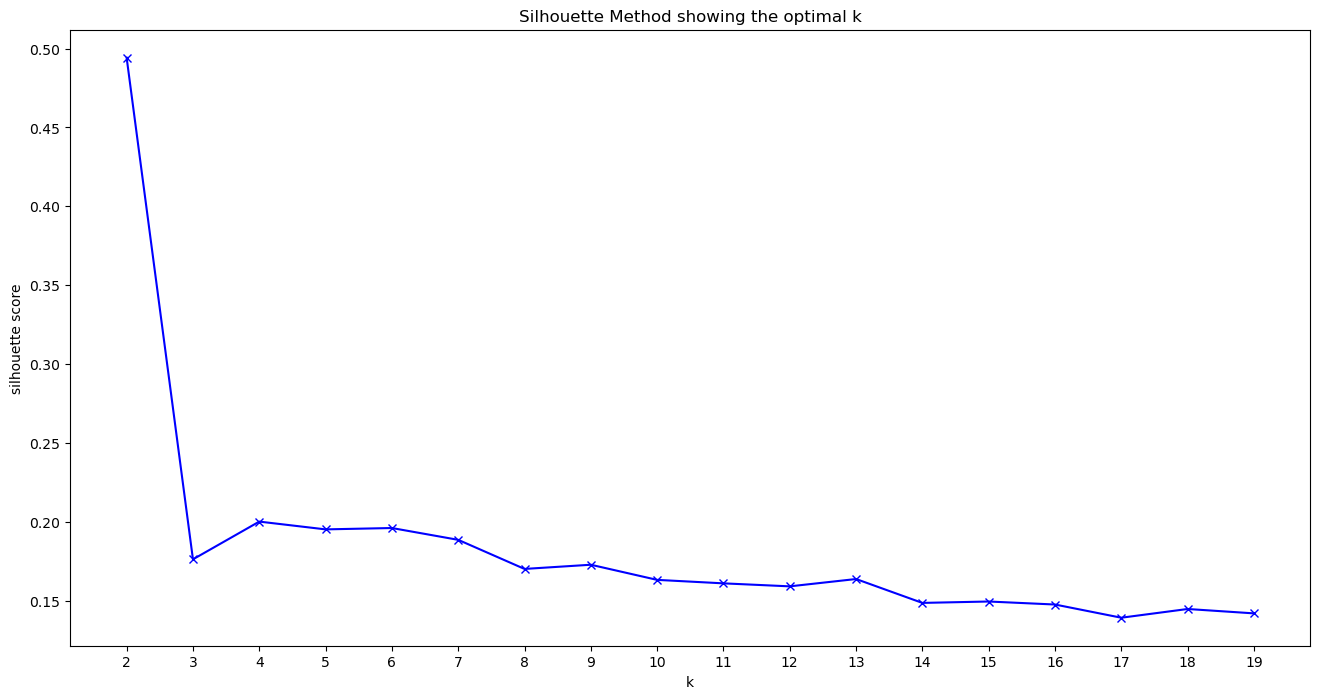

In [7]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(M_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(M_scaled_df, kmeans.predict(M_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [7]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(M_scaled_df)

C:\Users\Juliane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\Juliane\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\Juliane\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Juliane\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\Juliane\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in positi

KMeans(n_clusters=4, random_state=1234)

In [13]:
labels = kmeans.labels_
labels

array([ 4, 17,  9,  3, 14,  1,  3,  9,  3, 14,  7,  8,  5,  5, 13, 14,  0,
       17, 11,  0,  4,  4,  0, 13, 11,  5, 13,  7,  3, 16, 16, 13,  5,  0,
        8,  1, 17, 17,  3,  3,  8, 18,  3, 16,  3,  9,  3, 13,  9,  0,  3,
        7, 18,  5, 13,  5,  0, 16,  3, 17,  3,  7,  3, 13, 13, 18,  3, 18,
       13, 14, 13,  5,  5, 11, 15,  5, 18, 11, 16, 14,  5,  9,  5, 13,  9,
        1,  5, 17,  5,  3, 12,  8, 16,  3, 17, 13, 13,  0, 13,  3, 13,  9,
       14, 13,  7, 13,  7,  5,  5, 14, 17, 13, 17,  5,  1, 17, 13,  9, 13,
       11,  7,  9,  5,  3,  5,  5, 13, 17,  5,  5, 17, 13,  8,  9, 18,  9,
        3,  7,  9,  5, 13,  3,  0,  7,  5,  9,  8,  3,  5, 16,  5, 17,  5,
       12,  5, 11,  0,  9, 13,  7, 17, 11,  5, 17, 17,  0, 13,  8,  5, 17,
       11, 13, 14,  5, 18,  5,  0, 18,  0, 13, 17, 17, 12, 17,  5, 14,  1,
       13,  5,  5,  5, 17,  5,  9,  5, 14,  3,  9,  9,  5, 17,  8,  5, 16,
       17, 11,  9,  9,  0,  9, 18,  5,  9, 18,  1, 18,  9, 17,  5,  3, 17,
        4, 16, 18, 17,  5

In [15]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [14]:
clusters = kmeans.predict(M_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      29
1      63
2      18
3      73
4      29
5      87
6      37
7      44
8     102
9      46
10     24
11     17
12     24
13     86
14     39
15     10
16     57
17     49
18     29
dtype: int64

In [2]:
# assign a cluster to each example
labels = kmeans.predict(M_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(df_new.to_numpy()[row_ix, 1], df_new.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

NameError: name 'kmeans' is not defined

In [1]:
#adding 
df_new["cluster"] = clusters
df_new.head(2)

NameError: name 'clusters' is not defined

In [14]:
#just to check
M_scaled_df.head(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.861682,-0.304045,0.059140,1.969358,0.40788,-0.363984,-0.622191,-0.021074,0.274334
1,-0.047817,-0.602756,0.219146,-0.443692,0.60351,-0.378567,-0.431006,-1.247752,-1.348245


In [16]:
#M_scaled_df = M_scaled_df.to_csv("C:\\Users\\Juliane\\Documents\\GitHub\\labs_repo\\Spotipy\\M_scaled_df.csv")

In [17]:
#df_new = df_new.to_csv("C:\\Users\\Juliane\\Documents\\GitHub\\labs_repo\\Spotipy\\df_new.csv")

In [16]:
kmeans2 = KMeans(n_clusters=4,
                init="k-means++",
                n_init=20,  # try with 1, 4, 8, >> prob best 20, 30,<<< 100...
                max_iter=1,
                tol=0,   #not important now
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(M_scaled_df)
print(kmeans2.inertia_)

4009.467293474793


# Create a KMeans object and fit it to the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_new_song_scaled)

# Now you can use the trained kmeans model for predictions
new_song_predict = kmeans.predict(df_new_song_scaled)

In [17]:
#saving the SCALER pickle

def save(kmeans, M_scaled_df = "M_scaled_df.pickle"):
    with open(M_scaled_df, "wb") as f:
        	pickle.dump(kmeans, f)


In [18]:
save(scaler, "M_scaled_df.pickle")

In [26]:
#saving the KMEANS pickle

def save(kmeans2, name = "kmeans2.pickle"):
    with open(name, "wb") as f:
        	pickle.dump(kmeans2, f)

In [21]:
kmeans2

KMeans(algorithm='elkan', max_iter=1, n_clusters=4, n_init=20,
       random_state=1234, tol=0)

In [27]:
save(kmeans2, "kmeans2.pickle")


with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)